<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# 데이터프레임 변경 (3)

1) 다음 요구사항에 맞게 하나의 코드셀에 순서대로 구문을 작성하고 확인하세요. 

- 1-1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.
- 1-2) 다음 경로의 파일을 읽어와 air 데이터프레임을 만드세요.

    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality.csv'

In [1]:
import pandas as pd

path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality.csv'
air = pd.read_csv(path)

2) 상위 5개 행을 확인하세요.

In [2]:
air.head(5)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


3) 각 열에 결측치가 얼마나 있는지 확인하세요.

In [3]:
air.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

4) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요. 

- 4-1) Month, Day 열을 한 번에 삭제하세요.
- 4-2) Ozone, Solar.R 두 열 결측치를 바로 앞의 값으로 채우세요.
- 4-3) 각 열에 결측치가 남아있는지 확인하세요.

In [5]:
air = air.drop(columns=['Month', 'Day'])
air['Ozone'] = air['Ozone'].fillna(method='ffill')
air['Solar.R'] = air['Solar.R'].fillna(method='ffill')

air.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
dtype: int64

5) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 5-1) 기초통계량에서 Temp 열의 25%, 50%, 75% 값을 조회해 q1, q2, q3 변수를 선언하세요.
- 5-2) 아래 범위와 값을 참조해 'a' ~ 'd' 값을 갖는 TempGrp 열을 추가하세요.
    - q1 이하 → 'a'
    - q1 초과 q2 이하 → 'b'
    - q2 초과 q3 이하 → 'c'
    - q3 초과 → 'd'
- 5-3) TempGrp 별 Ozone 평균을 집계하여 tmp 데이터프레임을 선언하세요.
- 5-4) tmp 데이터프레임을 막대 그래프로 시각화해 확인하세요.

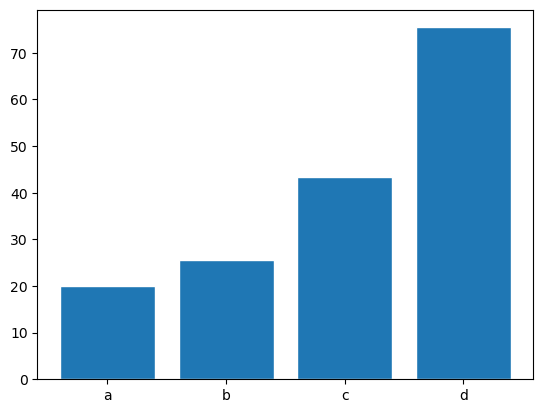

In [7]:
import numpy as np
import matplotlib.pyplot as plt

q1 = air['Temp'].describe()['25%']
q2 = air['Temp'].describe()['50%']
q3 = air['Temp'].describe()['75%']

bin = [-np.inf, q1, q2, q3, np.inf]
label = ['a', 'b', 'c', 'd']

air['TempGrp'] = pd.cut(air['Temp'], bins=bin, labels=label)

tmp = air.groupby('TempGrp', as_index=False)[['Ozone']].mean()

plt.bar(x=tmp['TempGrp'], height=tmp['Ozone'], edgecolor = 'w')
plt.show()